In [27]:
#Lendo dados formato TIF 
!wget https://anaconda.org/conda-forge/cartopy/0.16.0/download/linux-64/cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!tar xvjf cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install shapely pyshp
!apt install libproj-dev libgeos-dev
!pip install metpy
!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git
!pip install netCDF4

--2020-05-07 05:55:55--  https://anaconda.org/conda-forge/cartopy/0.16.0/download/linux-64/cartopy-0.16.0-py36h81b52dc_2.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.93.24, 104.17.92.24, 2606:4700::6811:5c18, ...
Connecting to anaconda.org (anaconda.org)|104.17.93.24|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/56f0128969180359233aa1e4/5b8b25251abf28133f2bfda9?response-content-disposition=attachment%3B%20filename%3D%22cartopy-0.16.0-py36h81b52dc_2.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27cartopy-0.16.0-py36h81b52dc_2.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=60&X-Amz-Date=20200507T055556Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEH0aCXVzLWVhc3QtMSJHMEUCIQCsvxt2PXC1tDaLqIyCrEWNxMpLs7OrJ98Kd2UtUAX%2FbQIgJYKhJGxS66kdE%2FNi6mimh0Tcd5P8BW%2F1K5BEfQZFvnQqvQMItv%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARAAGgw0NTU4NjQwOTgzNzgiDL87HsKIz

In [83]:
!wget https://github.com/vlsantos-bit/Exemplos_radar_livro/archive/master.zip

--2020-05-07 06:40:40--  https://github.com/vlsantos-bit/Exemplos_radar_livro/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vlsantos-bit/Exemplos_radar_livro/zip/master [following]
--2020-05-07 06:40:41--  https://codeload.github.com/vlsantos-bit/Exemplos_radar_livro/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.2’

master.zip.2            [     <=>            ]   3.58M  2.47MB/s    in 1.5s    

2020-05-07 06:40:43 (2.47 MB/s) - ‘master.zip.2’ saved [3751671]



In [84]:
!unzip master.zip.2

Archive:  master.zip.2
9a8350a59eea57955a3f1073035dd23b1487bf12
  inflating: Exemplos_radar_livro-master/2020050606400300KDP.vol.h5  
  inflating: Exemplos_radar_livro-master/2020050606400300PhiDP.vol.h5  
  inflating: Exemplos_radar_livro-master/2020050606400300RhoHV.vol.h5  
  inflating: Exemplos_radar_livro-master/2020050606400300V.vol.h5  
  inflating: Exemplos_radar_livro-master/2020050606400300W.vol.h5  
  inflating: Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5  
  inflating: Exemplos_radar_livro-master/2020050606400300dBZ.vol.h5  
  inflating: Exemplos_radar_livro-master/2020050606400300dBuZ.vol.h5  
replace Exemplos_radar_livro-master/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Exemplos_radar_livro-master/README.md  
  inflating: Exemplos_radar_livro-master/natal_ACC_250km_01h_20200428203003.tif  
  inflating: Exemplos_radar_livro-master/santa_teresa_PPI_400km_01gr_20200411160742 (1).tif  


In [30]:
!pip install georaster

In [0]:
from pyproj import Proj
import georaster
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

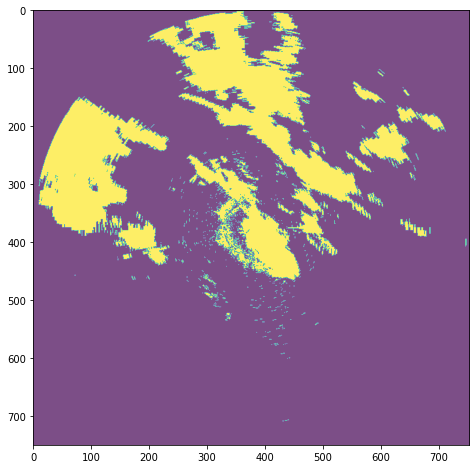

In [32]:
#Plotando imagem geotiff
image = georaster.SingleBandRaster('Exemplos_radar_livro-master/natal_ACC_250km_01h_20200428203003.tif', latlon=False)

fig = plt.figure(figsize=(8,8))
plt.imshow(image.r, alpha=0.7)
plt.show()


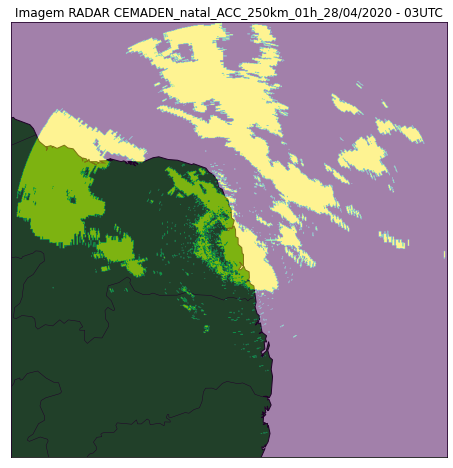

In [33]:
## Incluindo basemap na imagem tiff... Radar Santa Teresa - ES
dado = r"Exemplos_radar_livro-master/natal_ACC_250km_01h_20200428203003.tif"
fig = plt.figure(figsize=(8,8))

my_image = georaster.SingleBandRaster(dado, load_data=False)

minx, maxx, miny, maxy = my_image.extent

m = Basemap(projection='cyl',llcrnrlon=minx,llcrnrlat=miny,urcrnrlon=maxx,urcrnrlat=maxy,resolution='i')

m.drawcoastlines()
m.fillcontinents(color='green')
m.drawstates()

image = georaster.SingleBandRaster(dado,load_data=(minx, maxx, miny, maxy),latlon=True)

plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=10, alpha=0.5)
plt.title("Imagem RADAR CEMADEN_natal_ACC_250km_01h_28/04/2020 - 03UTC")
plt.show()


In [34]:
####Explorando dados hf5 ########################
!pip install wradlib

In [0]:
import matplotlib.pyplot as plt
import wradlib as wrl
import pylab as pl

In [0]:
####Dados Baixado - Radar Dual Polarímétrico Maceio vol_250km_13steps #########

#Exemplos_radar_livro-master/2020050606400300KDP.vol.h5  
#Exemplos_radar_livro-master/2020050606400300PhiDP.vol.h5  
#Exemplos_radar_livro-master/2020050606400300RhoHV.vol.h5  
#Exemplos_radar_livro-master/2020050606400300V.vol.h5  
#Exemplos_radar_livro-master/2020050606400300W.vol.h5  
#Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5  
#Exemplos_radar_livro-master/2020050606400300dBZ.vol.h5  
#Exemplos_radar_livro-master/2020050606400300dBuZ.vol.h5  

In [85]:
filename =('Exemplos_radar_livro-master/2020050606400300dBZ.vol.h5')
dado_rad = wrl.io.read_opera_hdf5(filename)
print(dado_rad.keys())
print(dado_rad['dataset1/what'])

dict_keys(['dataset1/data1/data', 'dataset1/data1/what', 'dataset1/how', 'dataset1/what', 'dataset1/where', 'dataset10/data1/data', 'dataset10/data1/what', 'dataset10/how', 'dataset10/what', 'dataset10/where', 'dataset11/data1/data', 'dataset11/data1/what', 'dataset11/how', 'dataset11/what', 'dataset11/where', 'dataset12/data1/data', 'dataset12/data1/what', 'dataset12/how', 'dataset12/what', 'dataset12/where', 'dataset13/data1/data', 'dataset13/data1/what', 'dataset13/how', 'dataset13/what', 'dataset13/where', 'dataset2/data1/data', 'dataset2/data1/what', 'dataset2/how', 'dataset2/what', 'dataset2/where', 'dataset3/data1/data', 'dataset3/data1/what', 'dataset3/how', 'dataset3/what', 'dataset3/where', 'dataset4/data1/data', 'dataset4/data1/what', 'dataset4/how', 'dataset4/what', 'dataset4/where', 'dataset5/data1/data', 'dataset5/data1/what', 'dataset5/how', 'dataset5/what', 'dataset5/where', 'dataset6/data1/data', 'dataset6/data1/what', 'dataset6/how', 'dataset6/what', 'dataset6/where',

In [86]:
print(dado_rad['where'])
print(dado_rad['how'])


{'height': 78.0, 'lat': -5.90448, 'lon': -35.25401}
{'beamwidth': 0.972, 'highprf': 600, 'lowprf': 480, 'software': b'RAINBOW', 'startepochs': 1588747203, 'stopepochs': 1588747658, 'system': b'NT1-P', 'wavelength': 10.714}


Text(0.5, 1.0, 'Radar Dual Polarímétrico Maceio vol_250km_13steps - dBuZ.vol')

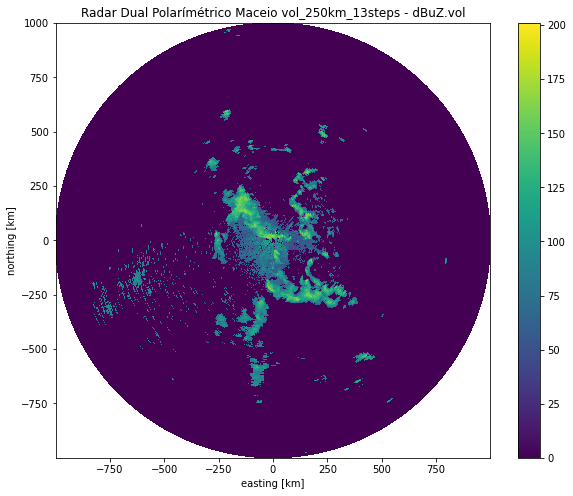

In [98]:
######Plotando toda área ##########################################
fig = plt.figure(figsize=(10,8))
ax,im = wrl.vis.plot_ppi(dado_rad['dataset1/data1/data'],fig=fig, func='pcolormesh')
ylabel = ax.set_xlabel('easting [km]')
ylabel = ax.set_ylabel('northing [km]')
cb = pl.colorbar(im, ax=ax)

plt.title('Radar Dual Polarímétrico Maceio vol_250km_13steps - dBuZ.vol')

In [100]:
filename1 =('Exemplos_radar_livro-master/2020050606400300ZDR.vol (1).h5')
dado_rad2 = wrl.io.read_opera_hdf5(filename1)
print(dado_rad.keys())
print(dado_rad['dataset1/data1/data'])

dict_keys(['dataset1/data1/data', 'dataset1/data1/what', 'dataset1/how', 'dataset1/what', 'dataset1/where', 'dataset10/data1/data', 'dataset10/data1/what', 'dataset10/how', 'dataset10/what', 'dataset10/where', 'dataset11/data1/data', 'dataset11/data1/what', 'dataset11/how', 'dataset11/what', 'dataset11/where', 'dataset12/data1/data', 'dataset12/data1/what', 'dataset12/how', 'dataset12/what', 'dataset12/where', 'dataset13/data1/data', 'dataset13/data1/what', 'dataset13/how', 'dataset13/what', 'dataset13/where', 'dataset2/data1/data', 'dataset2/data1/what', 'dataset2/how', 'dataset2/what', 'dataset2/where', 'dataset3/data1/data', 'dataset3/data1/what', 'dataset3/how', 'dataset3/what', 'dataset3/where', 'dataset4/data1/data', 'dataset4/data1/what', 'dataset4/how', 'dataset4/what', 'dataset4/where', 'dataset5/data1/data', 'dataset5/data1/what', 'dataset5/how', 'dataset5/what', 'dataset5/where', 'dataset6/data1/data', 'dataset6/data1/what', 'dataset6/how', 'dataset6/what', 'dataset6/where',

Text(0.5, 1.0, 'dBZ')

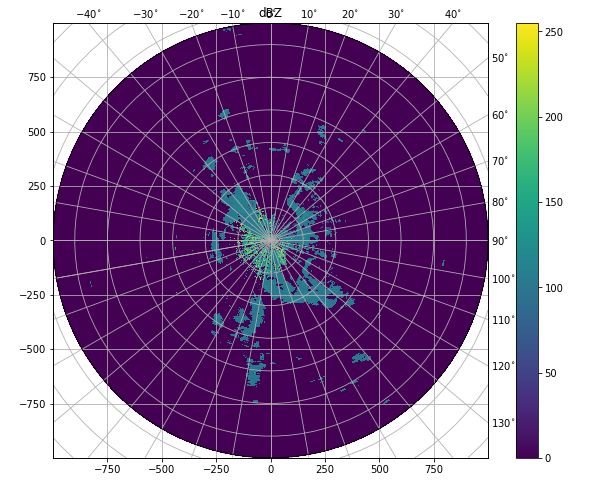

In [108]:
fig = plt.figure(figsize=(10,8))
ax,im2 = wrl.vis.plot_ppi(dado_rad2['dataset1/data1/data'], proj='cg',fig=fig,func='pcolormesh')
cb = pl.colorbar(im2, ax=ax)
plt.title('dBZ')

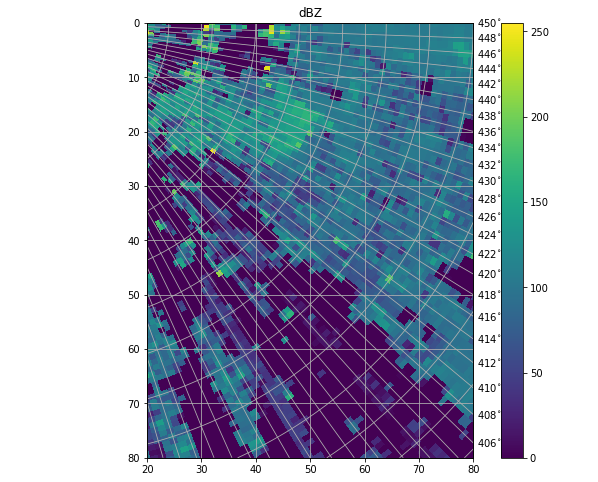

In [103]:
  ####Inserindo zoom 
fig = plt.figure(figsize=(10,8))
ax,im = wrl.vis.plot_ppi(dado_rad2['dataset1/data1/data'], proj='cg',fig=fig)

cb = pl.colorbar(im, ax=ax)
plt.title('dBZ')
# you can now also zoom - either programmatically or interactively
xlim = ax.set_xlim(20, 80)
ylim = ax.set_ylim(80, 0)